<a href="https://colab.research.google.com/github/NAYANDEEPSINGH/Machine-Learning-Projects/blob/main/Portfolio_Rebalance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()

Saving ind_nifty500list.csv to ind_nifty500list.csv


In [4]:
import pandas as pd
df = pd.read_csv("ind_nifty500list.csv")#Extracted list of Nifty 500 companies from NSE website
print(df.head())
symbols = df["Symbol"].astype(str).str.strip().tolist()#converts into string, remove spaces and Converts the cleaned pandas Series into a Python list


tickers = [s + ".NS" for s in symbols]
print("Total tickers:", len(tickers))
print("Sample tickers:", tickers[:10])

               Company Name                Industry     Symbol Series  \
0          360 ONE WAM Ltd.      Financial Services     360ONE     EQ   
1             3M India Ltd.             Diversified    3MINDIA     EQ   
2            ABB India Ltd.           Capital Goods        ABB     EQ   
3                  ACC Ltd.  Construction Materials        ACC     EQ   
4  ACME Solar Holdings Ltd.                   Power  ACMESOLAR     EQ   

      ISIN Code  
0  INE466L01038  
1  INE470A01017  
2  INE117A01022  
3  INE012A01025  
4  INE622W01025  
Total tickers: 503
Sample tickers: ['360ONE.NS', '3MINDIA.NS', 'ABB.NS', 'ACC.NS', 'ACMESOLAR.NS', 'AIAENG.NS', 'APLAPOLLO.NS', 'AUBANK.NS', 'AWL.NS', 'AADHARHFC.NS']


In [5]:
tickers

['360ONE.NS',
 '3MINDIA.NS',
 'ABB.NS',
 'ACC.NS',
 'ACMESOLAR.NS',
 'AIAENG.NS',
 'APLAPOLLO.NS',
 'AUBANK.NS',
 'AWL.NS',
 'AADHARHFC.NS',
 'AARTIIND.NS',
 'AAVAS.NS',
 'ABBOTINDIA.NS',
 'ACE.NS',
 'ADANIENSOL.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANIPOWER.NS',
 'ATGL.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'ABLBL.NS',
 'ABREL.NS',
 'ABSLAMC.NS',
 'AEGISLOG.NS',
 'AEGISVOPAK.NS',
 'AFCONS.NS',
 'AFFLE.NS',
 'AJANTPHARM.NS',
 'AKUMS.NS',
 'AKZOINDIA.NS',
 'APLLTD.NS',
 'ALKEM.NS',
 'ALKYLAMINE.NS',
 'ALOKINDS.NS',
 'ARE&M.NS',
 'AMBER.NS',
 'AMBUJACEM.NS',
 'ANANDRATHI.NS',
 'ANANTRAJ.NS',
 'ANGELONE.NS',
 'APARINDS.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'APTUS.NS',
 'ASAHIINDIA.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTERDM.NS',
 'ASTRAZEN.NS',
 'ASTRAL.NS',
 'ATHERENERG.NS',
 'ATUL.NS',
 'AUROPHARMA.NS',
 'AIIL.NS',
 'DMART.NS',
 'AXISBANK.NS',
 'BASF.NS',
 'BEML.NS',
 'BLS.NS',
 'BSE.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS'

In [6]:
import yfinance as yf
from datetime import datetime

start_date = "2010-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

all_data = []

for i in range(0, len(tickers), 50):  # 50 tickers per batch
    batch = tickers[i:i+50]
    print(f"Downloading batch {i//50 + 1}: {batch[0]} → {batch[-1]}")
    data = yf.download(batch, start=start_date, end=end_date, group_by='ticker', interval='1d', threads=True)

    for t in batch:
        try:
            df_temp = data[t].copy().reset_index()
            df_temp["ticker"] = t.replace(".NS", "")
            all_data.append(df_temp)
        except Exception as e:
            print("Error for", t, ":", e)

# Combine all
final_df = pd.concat(all_data, ignore_index=True)
final_df = final_df.dropna(subset=["Close"]).reset_index(drop=True)

print(final_df.head())
print("Final dataset shape:", final_df.shape)

/tmp/ipython-input-214191861.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(batch, start=start_date, end=end_date, group_by='ticker', interval='1d', threads=True)
[*********************100%***********************]  50 of 50 completed


/tmp/ipython-input-214191861.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(batch, start=start_date, end=end_date, group_by='ticker', interval='1d', threads=True)
[*********************100%***********************]  50 of 50 completed
/tmp/ipython-input-214191861.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(batch, start=start_date, end=end_date, group_by='ticker', interval='1d', threads=True)


[**********************78%************           ]  39 of 50 completedERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: DUMMYSKFIN.NS"}}}
[*********************100%***********************]  50 of 50 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DUMMYSKFIN.NS']: YFTzMissingError('possibly delisted; no timezone found')


/tmp/ipython-input-214191861.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(batch, start=start_date, end=end_date, group_by='ticker', interval='1d', threads=True)
[****                   8%                       ]  4 of 50 completedERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: DUMMYTATAM.NS"}}}
[*********************100%***********************]  50 of 50 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['DUMMYTATAM.NS', 'DUMMYDBRLT.NS']: YFTzMissingError('possibly delisted; no timezone found')


/tmp/ipython-input-214191861.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(batch, start=start_date, end=end_date, group_by='ticker', interval='1d', threads=True)
[*********************100%***********************]  50 of 50 completed


/tmp/ipython-input-214191861.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(batch, start=start_date, end=end_date, group_by='ticker', interval='1d', threads=True)
[*********************100%***********************]  50 of 50 completed
/tmp/ipython-input-214191861.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(batch, start=start_date, end=end_date, group_by='ticker', interval='1d', threads=True)


[*********************100%***********************]  50 of 50 completed
/tmp/ipython-input-214191861.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(batch, start=start_date, end=end_date, group_by='ticker', interval='1d', threads=True)


[*********************100%***********************]  50 of 50 completed
/tmp/ipython-input-214191861.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(batch, start=start_date, end=end_date, group_by='ticker', interval='1d', threads=True)


[*********************100%***********************]  50 of 50 completed
/tmp/ipython-input-214191861.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(batch, start=start_date, end=end_date, group_by='ticker', interval='1d', threads=True)


[*********************100%***********************]  50 of 50 completed
/tmp/ipython-input-214191861.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(batch, start=start_date, end=end_date, group_by='ticker', interval='1d', threads=True)


[*********************100%***********************]  3 of 3 completed


Price       Date        Open        High         Low       Close     Volume  \
0     2019-09-19  247.222377  259.583496  247.222377  259.583496  7109860.0   
1     2019-09-20  271.535976  272.557556  271.535976  272.557556  2760648.0   
2     2019-09-23  286.185394  286.185394  286.185394  286.185394    34096.0   
3     2019-09-24  300.487488  300.487488  300.487488  300.487488  2496652.0   
4     2019-09-25  315.504777  315.504777  285.470323  287.053772   530580.0   

Price  ticker  Adj Close  
0      360ONE        NaN  
1      360ONE        NaN  
2      360ONE        NaN  
3      360ONE        NaN  
4      360ONE        NaN  
Final dataset shape: (1441239, 8)


In [7]:
final_df

Price,Date,Open,High,Low,Close,Volume,ticker,Adj Close
0,2019-09-19,247.222377,259.583496,247.222377,259.583496,7109860.0,360ONE,NaN
1,2019-09-20,271.535976,272.557556,271.535976,272.557556,2760648.0,360ONE,NaN
2,2019-09-23,286.185394,286.185394,286.185394,286.185394,34096.0,360ONE,NaN
3,2019-09-24,300.487488,300.487488,300.487488,300.487488,2496652.0,360ONE,NaN
4,2019-09-25,315.504777,315.504777,285.470323,287.053772,530580.0,360ONE,NaN
...,...,...,...,...,...,...,...,...
1441234,2025-10-20,4174.000000,4393.000000,4153.899902,4314.399902,433578.0,ECLERX,NaN
1441235,2025-10-21,4359.000000,4527.000000,4335.899902,4439.799805,51926.0,ECLERX,NaN
1441236,2025-10-23,4439.799805,4455.000000,4305.399902,4343.799805,128047.0,ECLERX,NaN
1441237,2025-10-24,4389.000000,4520.000000,4301.000000,4446.600098,105996.0,ECLERX,NaN


In [8]:
import pandas as pd

# 1️⃣ Clean column names (make lowercase and consistent)
final_df.columns = [c.strip().lower() for c in final_df.columns]

final_df = final_df[['date', 'open', 'high', 'low', 'close', 'volume', 'ticker']]

# 3️⃣ Convert date column to datetime (with timezone)
final_df['date'] = pd.to_datetime(final_df['date']).dt.tz_localize('Asia/Kolkata', nonexistent='shift_forward', ambiguous='NaT')

final_df = final_df.sort_values(['ticker', 'date']).reset_index(drop=True)
final_df['returns'] = final_df.groupby('ticker')['close'].pct_change()
final_df = final_df[['date', 'open', 'high', 'low', 'close', 'volume', 'returns', 'ticker']]
final_df.to_csv("final_df_formatted.csv", index=False)

print("✅ Dataset successfully converted!")
print(final_df.head())


/tmp/ipython-input-1805603257.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['date'] = pd.to_datetime(final_df['date']).dt.tz_localize('Asia/Kolkata', nonexistent='shift_forward', ambiguous='NaT')


✅ Dataset successfully converted!
                       date        open        high         low       close  \
0 2019-09-19 00:00:00+05:30  247.222377  259.583496  247.222377  259.583496   
1 2019-09-20 00:00:00+05:30  271.535976  272.557556  271.535976  272.557556   
2 2019-09-23 00:00:00+05:30  286.185394  286.185394  286.185394  286.185394   
3 2019-09-24 00:00:00+05:30  300.487488  300.487488  300.487488  300.487488   
4 2019-09-25 00:00:00+05:30  315.504777  315.504777  285.470323  287.053772   

      volume   returns  ticker  
0  7109860.0       NaN  360ONE  
1  2760648.0  0.049980  360ONE  
2    34096.0  0.050000  360ONE  
3  2496652.0  0.049975  360ONE  
4   530580.0 -0.044706  360ONE  


In [9]:
final_df

,date,open,high,low,close,volume,returns,ticker
0,2019-09-19 00:00:00+05:30,247.222377,259.583496,247.222377,259.583496,7109860.0,NaN,360ONE
1,2019-09-20 00:00:00+05:30,271.535976,272.557556,271.535976,272.557556,2760648.0,0.049980,360ONE
2,2019-09-23 00:00:00+05:30,286.185394,286.185394,286.185394,286.185394,34096.0,0.050000,360ONE
3,2019-09-24 00:00:00+05:30,300.487488,300.487488,300.487488,300.487488,2496652.0,0.049975,360ONE
4,2019-09-25 00:00:00+05:30,315.504777,315.504777,285.470323,287.053772,530580.0,-0.044706,360ONE
...,...,...,...,...,...,...,...,...
1441234,2025-10-20 00:00:00+05:30,988.000000,1016.000000,988.000000,1002.349976,820061.0,0.014884,ZYDUSLIFE
1441235,2025-10-21 00:00:00+05:30,1002.349976,1006.900024,996.549988,999.500000,59416.0,-0.002843,ZYDUSLIFE
1441236,2025-10-23 00:00:00+05:30,1013.950012,1013.950012,1003.049988,1009.000000,693670.0,0.009505,ZYDUSLIFE
1441237,2025-10-24 00:00:00+05:30,1008.950012,1008.950012,991.049988,1004.900024,583326.0,-0.004063,ZYDUSLIFE


In [10]:
combined_df = final_df

In [11]:
combined_df

,date,open,high,low,close,volume,returns,ticker
0,2019-09-19 00:00:00+05:30,247.222377,259.583496,247.222377,259.583496,7109860.0,NaN,360ONE
1,2019-09-20 00:00:00+05:30,271.535976,272.557556,271.535976,272.557556,2760648.0,0.049980,360ONE
2,2019-09-23 00:00:00+05:30,286.185394,286.185394,286.185394,286.185394,34096.0,0.050000,360ONE
3,2019-09-24 00:00:00+05:30,300.487488,300.487488,300.487488,300.487488,2496652.0,0.049975,360ONE
4,2019-09-25 00:00:00+05:30,315.504777,315.504777,285.470323,287.053772,530580.0,-0.044706,360ONE
...,...,...,...,...,...,...,...,...
1441234,2025-10-20 00:00:00+05:30,988.000000,1016.000000,988.000000,1002.349976,820061.0,0.014884,ZYDUSLIFE
1441235,2025-10-21 00:00:00+05:30,1002.349976,1006.900024,996.549988,999.500000,59416.0,-0.002843,ZYDUSLIFE
1441236,2025-10-23 00:00:00+05:30,1013.950012,1013.950012,1003.049988,1009.000000,693670.0,0.009505,ZYDUSLIFE
1441237,2025-10-24 00:00:00+05:30,1008.950012,1008.950012,991.049988,1004.900024,583326.0,-0.004063,ZYDUSLIFE


In [12]:
import pandas as pd
combined_df = combined_df.sort_values(by=['ticker', 'date']).reset_index(drop=True)

combined_df['momentum_20'] = combined_df.groupby('ticker')['close'].pct_change(periods=20)
combined_df['volatility_20'] = combined_df.groupby('ticker')['returns'].rolling(window=20).std().reset_index(level=0, drop=True)

# Drop rows where factors could not be computed yet (first 20 days per stock)
combined_df = combined_df.dropna(subset=['momentum_20', 'volatility_20']).reset_index(drop=True)

combined_df.to_parquet("/content/combined_with_factors.parquet")
print("✅ Dataset with momentum & volatility factors saved!")
print(combined_df.head())


✅ Dataset with momentum & volatility factors saved!
                       date        open        high         low       close  \
0 2019-10-22 00:00:00+05:30  253.351847  253.351847  230.887312  242.594604   
1 2019-10-23 00:00:00+05:30  243.136063  249.449433  242.758083  246.813751   
2 2019-10-24 00:00:00+05:30  254.363213  254.363213  245.168993  246.650284   
3 2019-10-25 00:00:00+05:30  254.169103  262.546059  247.232585  258.612976   
4 2019-10-27 00:00:00+05:30  265.396257  272.353227  261.728795  265.631226   

    volume   returns  ticker  momentum_20  volatility_20  
0  28188.0 -0.012804  360ONE    -0.065447       0.035313  
1  26960.0  0.017392  360ONE    -0.094453       0.033453  
2   4612.0 -0.000662  360ONE    -0.138145       0.030940  
3  71760.0  0.048501  360ONE    -0.139355       0.030799  
4  19848.0  0.027138  360ONE    -0.074629       0.030359  


In [13]:
combined_df

,date,open,high,low,close,volume,returns,ticker,momentum_20,volatility_20
0,2019-10-22 00:00:00+05:30,253.351847,253.351847,230.887312,242.594604,28188.0,-0.012804,360ONE,-0.065447,0.035313
1,2019-10-23 00:00:00+05:30,243.136063,249.449433,242.758083,246.813751,26960.0,0.017392,360ONE,-0.094453,0.033453
2,2019-10-24 00:00:00+05:30,254.363213,254.363213,245.168993,246.650284,4612.0,-0.000662,360ONE,-0.138145,0.030940
3,2019-10-25 00:00:00+05:30,254.169103,262.546059,247.232585,258.612976,71760.0,0.048501,360ONE,-0.139355,0.030799
4,2019-10-27 00:00:00+05:30,265.396257,272.353227,261.728795,265.631226,19848.0,0.027138,360ONE,-0.074629,0.030359
...,...,...,...,...,...,...,...,...,...,...
1431246,2025-10-20 00:00:00+05:30,988.000000,1016.000000,988.000000,1002.349976,820061.0,0.014884,ZYDUSLIFE,-0.033693,0.013542
1431247,2025-10-21 00:00:00+05:30,1002.349976,1006.900024,996.549988,999.500000,59416.0,-0.002843,ZYDUSLIFE,-0.034952,0.013544
1431248,2025-10-23 00:00:00+05:30,1013.950012,1013.950012,1003.049988,1009.000000,693670.0,0.009505,ZYDUSLIFE,-0.034311,0.013572
1431249,2025-10-24 00:00:00+05:30,1008.950012,1008.950012,991.049988,1004.900024,583326.0,-0.004063,ZYDUSLIFE,-0.030019,0.013492


In [14]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestRegressor

In [15]:

combined_df['momentum_5'] = combined_df.groupby('ticker')['close'].pct_change(periods=5)
combined_df['momentum_60'] = combined_df.groupby('ticker')['close'].pct_change(periods=60)
combined_df['avg_volume_20'] = combined_df.groupby('ticker')['volume'].rolling(window=20).mean().reset_index(level=0, drop=True)

# Next-week (5 trading days ahead) forward return — used as target for prediction
combined_df['next_week_return'] = combined_df.groupby('ticker')['close'].pct_change(periods=-5)

# Drop rows with NaNs caused by rolling calculations
combined_df = combined_df.dropna(subset=[
    'momentum_5', 'momentum_20', 'momentum_60',
    'volatility_20', 'avg_volume_20', 'next_week_return'
]).reset_index(drop=True)

# Save final dataset
combined_df.to_parquet("/content/combined_with_all_factors.parquet")
print("✅ Final dataset with all factors saved!")
print(combined_df.head())
print(combined_df.columns)


✅ Final dataset with all factors saved!
                       date        open        high         low       close  \
0 2020-01-16 00:00:00+05:30  242.545597  251.182561  239.055792  248.897217   
1 2020-01-17 00:00:00+05:30  250.873777  284.330477  249.123735  279.378876   
2 2020-01-20 00:00:00+05:30  284.124554  288.036414  266.819712  278.246460   
3 2020-01-21 00:00:00+05:30  275.034585  288.036375  267.447642  269.485931   
4 2020-01-22 00:00:00+05:30  273.233137  276.630279  269.712468  270.618378   

     volume   returns  ticker  momentum_20  volatility_20  momentum_5  \
0   67456.0  0.030473  360ONE     0.074673       0.023445    0.026579   
1  276092.0  0.122467  360ONE     0.213188       0.035241    0.192871   
2   92184.0 -0.004053  360ONE     0.209730       0.035296    0.201449   
3   43336.0 -0.031485  360ONE     0.176275       0.036394    0.139412   
4    7864.0  0.004202  360ONE     0.209144       0.035641    0.120402   

   momentum_60  avg_volume_20  next_week_retur

In [16]:
combined_df

,date,open,high,low,close,volume,returns,ticker,momentum_20,volatility_20,momentum_5,momentum_60,avg_volume_20,next_week_return
0,2020-01-16 00:00:00+05:30,242.545597,251.182561,239.055792,248.897217,67456.0,0.030473,360ONE,0.074673,0.023445,0.026579,0.025980,47407.00,-0.089684
1,2020-01-17 00:00:00+05:30,250.873777,284.330477,249.123735,279.378876,276092.0,0.122467,360ONE,0.213188,0.035241,0.192871,0.131942,58986.20,0.028928
2,2020-01-20 00:00:00+05:30,284.124554,288.036414,266.819712,278.246460,92184.0,-0.004053,360ONE,0.209730,0.035296,0.201449,0.128101,62085.60,0.033653
3,2020-01-21 00:00:00+05:30,275.034585,288.036375,267.447642,269.485931,43336.0,-0.031485,360ONE,0.176275,0.036394,0.139412,0.042043,63016.00,0.003065
4,2020-01-22 00:00:00+05:30,273.233137,276.630279,269.712468,270.618378,7864.0,0.004202,360ONE,0.209144,0.035641,0.120402,0.018775,62126.80,0.017337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398811,2025-10-13 00:00:00+05:30,990.000000,998.000000,985.299988,995.500000,727760.0,0.002064,ZYDUSLIFE,-0.047140,0.013017,0.000855,0.039224,961738.85,-0.006834
1398812,2025-10-14 00:00:00+05:30,995.000000,997.450012,974.549988,979.250000,827749.0,-0.016323,ZYDUSLIFE,-0.055598,0.013346,-0.008756,0.007853,983550.90,-0.020260
1398813,2025-10-15 00:00:00+05:30,979.250000,990.000000,975.000000,977.299988,563166.0,-0.001991,ZYDUSLIFE,-0.055292,0.013347,-0.008773,0.013893,986125.60,-0.031417
1398814,2025-10-16 00:00:00+05:30,977.299988,989.000000,974.750000,984.599976,832737.0,0.007470,ZYDUSLIFE,-0.047591,0.013537,-0.009905,0.026679,990052.05,-0.020201


In [17]:
# ---------------------------
# CLEAN FEATURES TO AVOID ERRORS
# ---------------------------
features = ['momentum_5','momentum_20','momentum_60','volatility_20','avg_volume_20']

# Replace inf with NaN and drop NaN rows
combined_df = combined_df.replace([np.inf, -np.inf], np.nan)
combined_df = combined_df.dropna(subset=features + ['next_week_return'])

# Clip extreme outliers
for f in features:
    combined_df[f] = combined_df[f].clip(-1, 1)  # between -100% and +100%

combined_df['date'] = pd.to_datetime(combined_df['date'])
all_dates = sorted(combined_df['date'].unique())

weekly_dates = all_dates[::5]  # roughly every 5 trading days


In [19]:
combined_df

,date,open,high,low,close,volume,returns,ticker,momentum_20,volatility_20,momentum_5,momentum_60,avg_volume_20,next_week_return
0,2020-01-16 00:00:00+05:30,242.545597,251.182561,239.055792,248.897217,67456.0,0.030473,360ONE,0.074673,0.023445,0.026579,0.025980,1.0,-0.089684
1,2020-01-17 00:00:00+05:30,250.873777,284.330477,249.123735,279.378876,276092.0,0.122467,360ONE,0.213188,0.035241,0.192871,0.131942,1.0,0.028928
2,2020-01-20 00:00:00+05:30,284.124554,288.036414,266.819712,278.246460,92184.0,-0.004053,360ONE,0.209730,0.035296,0.201449,0.128101,1.0,0.033653
3,2020-01-21 00:00:00+05:30,275.034585,288.036375,267.447642,269.485931,43336.0,-0.031485,360ONE,0.176275,0.036394,0.139412,0.042043,1.0,0.003065
4,2020-01-22 00:00:00+05:30,273.233137,276.630279,269.712468,270.618378,7864.0,0.004202,360ONE,0.209144,0.035641,0.120402,0.018775,1.0,0.017337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398811,2025-10-13 00:00:00+05:30,990.000000,998.000000,985.299988,995.500000,727760.0,0.002064,ZYDUSLIFE,-0.047140,0.013017,0.000855,0.039224,1.0,-0.006834
1398812,2025-10-14 00:00:00+05:30,995.000000,997.450012,974.549988,979.250000,827749.0,-0.016323,ZYDUSLIFE,-0.055598,0.013346,-0.008756,0.007853,1.0,-0.020260
1398813,2025-10-15 00:00:00+05:30,979.250000,990.000000,975.000000,977.299988,563166.0,-0.001991,ZYDUSLIFE,-0.055292,0.013347,-0.008773,0.013893,1.0,-0.031417
1398814,2025-10-16 00:00:00+05:30,977.299988,989.000000,974.750000,984.599976,832737.0,0.007470,ZYDUSLIFE,-0.047591,0.013537,-0.009905,0.026679,1.0,-0.020201


In [18]:
df_all = combined_df

In [20]:
df_all

,date,open,high,low,close,volume,returns,ticker,momentum_20,volatility_20,momentum_5,momentum_60,avg_volume_20,next_week_return
0,2020-01-16 00:00:00+05:30,242.545597,251.182561,239.055792,248.897217,67456.0,0.030473,360ONE,0.074673,0.023445,0.026579,0.025980,1.0,-0.089684
1,2020-01-17 00:00:00+05:30,250.873777,284.330477,249.123735,279.378876,276092.0,0.122467,360ONE,0.213188,0.035241,0.192871,0.131942,1.0,0.028928
2,2020-01-20 00:00:00+05:30,284.124554,288.036414,266.819712,278.246460,92184.0,-0.004053,360ONE,0.209730,0.035296,0.201449,0.128101,1.0,0.033653
3,2020-01-21 00:00:00+05:30,275.034585,288.036375,267.447642,269.485931,43336.0,-0.031485,360ONE,0.176275,0.036394,0.139412,0.042043,1.0,0.003065
4,2020-01-22 00:00:00+05:30,273.233137,276.630279,269.712468,270.618378,7864.0,0.004202,360ONE,0.209144,0.035641,0.120402,0.018775,1.0,0.017337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398811,2025-10-13 00:00:00+05:30,990.000000,998.000000,985.299988,995.500000,727760.0,0.002064,ZYDUSLIFE,-0.047140,0.013017,0.000855,0.039224,1.0,-0.006834
1398812,2025-10-14 00:00:00+05:30,995.000000,997.450012,974.549988,979.250000,827749.0,-0.016323,ZYDUSLIFE,-0.055598,0.013346,-0.008756,0.007853,1.0,-0.020260
1398813,2025-10-15 00:00:00+05:30,979.250000,990.000000,975.000000,977.299988,563166.0,-0.001991,ZYDUSLIFE,-0.055292,0.013347,-0.008773,0.013893,1.0,-0.031417
1398814,2025-10-16 00:00:00+05:30,977.299988,989.000000,974.750000,984.599976,832737.0,0.007470,ZYDUSLIFE,-0.047591,0.013537,-0.009905,0.026679,1.0,-0.020201


In [21]:
# Save df_all as pickle
df_all.to_pickle('/content/drive/MyDrive/df_all1.pkl')

print("✅ df_all saved successfully to Google Drive as pickle!")

✅ df_all saved successfully to Google Drive as pickle!


In [22]:
df_all = pd.read_pickle('/content/drive/MyDrive/df_all1.pkl')
print("✅ df_all loaded successfully!")
print(df_all.shape)

✅ df_all loaded successfully!
(1398816, 14)


In [23]:
df_all

,date,open,high,low,close,volume,returns,ticker,momentum_20,volatility_20,momentum_5,momentum_60,avg_volume_20,next_week_return
0,2020-01-16 00:00:00+05:30,242.545597,251.182561,239.055792,248.897217,67456.0,0.030473,360ONE,0.074673,0.023445,0.026579,0.025980,1.0,-0.089684
1,2020-01-17 00:00:00+05:30,250.873777,284.330477,249.123735,279.378876,276092.0,0.122467,360ONE,0.213188,0.035241,0.192871,0.131942,1.0,0.028928
2,2020-01-20 00:00:00+05:30,284.124554,288.036414,266.819712,278.246460,92184.0,-0.004053,360ONE,0.209730,0.035296,0.201449,0.128101,1.0,0.033653
3,2020-01-21 00:00:00+05:30,275.034585,288.036375,267.447642,269.485931,43336.0,-0.031485,360ONE,0.176275,0.036394,0.139412,0.042043,1.0,0.003065
4,2020-01-22 00:00:00+05:30,273.233137,276.630279,269.712468,270.618378,7864.0,0.004202,360ONE,0.209144,0.035641,0.120402,0.018775,1.0,0.017337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398811,2025-10-13 00:00:00+05:30,990.000000,998.000000,985.299988,995.500000,727760.0,0.002064,ZYDUSLIFE,-0.047140,0.013017,0.000855,0.039224,1.0,-0.006834
1398812,2025-10-14 00:00:00+05:30,995.000000,997.450012,974.549988,979.250000,827749.0,-0.016323,ZYDUSLIFE,-0.055598,0.013346,-0.008756,0.007853,1.0,-0.020260
1398813,2025-10-15 00:00:00+05:30,979.250000,990.000000,975.000000,977.299988,563166.0,-0.001991,ZYDUSLIFE,-0.055292,0.013347,-0.008773,0.013893,1.0,-0.031417
1398814,2025-10-16 00:00:00+05:30,977.299988,989.000000,974.750000,984.599976,832737.0,0.007470,ZYDUSLIFE,-0.047591,0.013537,-0.009905,0.026679,1.0,-0.020201


In [24]:
import os, random
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# ---------- FIX RANDOMNESS FOR CONSISTENCY ----------
os.environ["PYTHONHASHSEED"] = "42"
np.random.seed(42)
random.seed(42)

# ---------- PARAMETERS ----------
initial_capital = 2_000_000
top_n = 20
lookback_days = 180        # ✅ reduced from 252 to start investing earlier (~6 months)
rebalance_days = 40
features = ['momentum_5', 'momentum_20', 'momentum_60', 'volatility_20', 'avg_volume_20']
random_state = 42



In [25]:


# ---------- PREP DATA ----------
df_all['date'] = pd.to_datetime(df_all['date']).dt.tz_localize(None)
df_all = df_all.sort_values('date').reset_index(drop=True)

# Compute forward 2-month return (for prediction target)
df_all['next_2month_return'] = df_all.groupby('ticker')['close'].pct_change(rebalance_days).shift(-rebalance_days)

# ---------- MEDIUM-TERM TECHNICAL INDICATORS ----------
# MA 50 & 200
df_all['ma_50'] = df_all.groupby('ticker')['close'].transform(lambda x: x.rolling(50).mean())
df_all['ma_200'] = df_all.groupby('ticker')['close'].transform(lambda x: x.rolling(200).mean()) #If MA50 > MA200 → stock is in an uptrend.

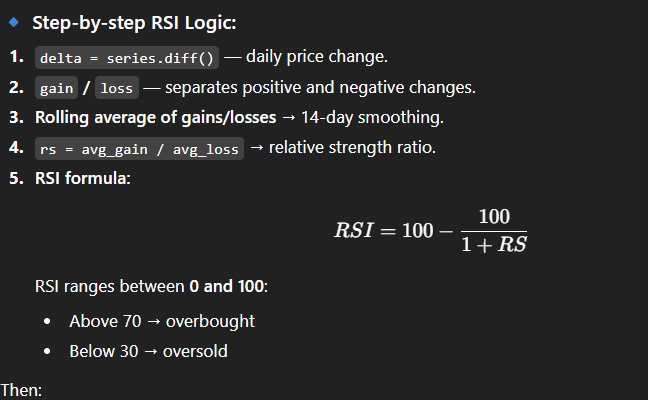

RSI measures the speed and magnitude of recent price changes to identify overbought or oversold conditions. In a bullish trend, RSI tends to stay in 40–80 range, bouncing near 40. In a bearish trend, RSI tends to stay in 20–60 range, bouncing near 60. (latest_rows['rsi_14'].between(40, 70)).This keeps stocks that are not overbought (>70) and not weak (<40) — meaning healthy uptrend momentum.

In [26]:
# RSI(14)
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(period).mean()
    avg_loss = loss.rolling(period).mean()
    rs = avg_gain / (avg_loss + 1e-9)
    return 100 - (100 / (1 + rs))

df_all['rsi_14'] = df_all.groupby('ticker')['close'].transform(compute_rsi)



### 📘 MACD (Moving Average Convergence Divergence)

The **MACD** is a trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of price.

Display equation:
$$
\mathrm{MACD}_t \;=\; EMA_{12}(P_t) \;-\; EMA_{26}(P_t)
$$

Signal line:
$$
\mathrm{Signal}_t \;=\; EMA_{9}(\mathrm{MACD}_t)
$$

Inline example: the histogram is written as $(\mathrm{MACD} - \mathrm{Signal})$.

**Interpretation:**
- When **MACD > Signal** → bullish momentum (buy signal) (We are using this condition for the project).  
- When **MACD < Signal** → bearish momentum (sell signal).


In [27]:




# MACD(12,26,9)
def compute_macd(series):
    ema12 = series.ewm(span=12, adjust=False).mean()
    ema26 = series.ewm(span=26, adjust=False).mean()
    macd = ema12 - ema26
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal

macd_list = []
for ticker, group in df_all.groupby('ticker'):
    macd, signal = compute_macd(group['close'])
    macd_list.append(pd.DataFrame({
        'index': group.index,
        'macd': macd,
        'macd_signal': signal
    }))
macd_df = pd.concat(macd_list).set_index('index').sort_index()
df_all['macd'] = macd_df['macd']
df_all['macd_signal'] = macd_df['macd_signal']


### 📘 Average True Range (ATR)

The **ATR (Average True Range)** measures **market volatility** — how much a stock typically moves in a day.  
It does **not** indicate trend direction, only the **degree of price fluctuation**.

**Formula:**

For each day:

$$
TR = \max(High - Low,\ |High - Close_{prev}|,\ |Low - Close_{prev}|)
$$

Then the **ATR** is the **14-day moving average** of these True Range (TR) values:

$$
ATR_{14} = \text{MA}_{14}(TR)
$$

---

### 📈 How It’s Used in This Project

- ATR helps **filter out highly volatile stocks**.  
- During stock selection, we apply this condition:

$$
ATR_{14} \leq \text{75th percentile of all ATRs}
$$

✅ **Interpretation:**  
This means we only select **moderate-volatility stocks**, avoiding sudden price swings.  
It keeps the portfolio **stable** and **risk-controlled**, focusing on smoother uptrends rather than erratic ones.


In [28]:

# ATR(14)
def compute_atr(df, period=14):
    high_low = df['high'] - df['low']
    high_close = np.abs(df['high'] - df['close'].shift())
    low_close = np.abs(df['low'] - df['close'].shift())
    tr = high_low.combine(high_close, max).combine(low_close, max)
    return tr.rolling(period).mean()

df_all['atr_14'] = df_all.groupby('ticker').apply(compute_atr).reset_index(level=0, drop=True)



/tmp/ipython-input-595421158.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_all['atr_14'] = df_all.groupby('ticker').apply(compute_atr).reset_index(level=0, drop=True)


In [29]:
# ---------- SIMULATION PARAMETERS ----------
start_date = pd.Timestamp('2010-01-01')
end_date = pd.Timestamp('2025-12-31')
all_trading_dates = df_all[(df_all['date'] >= start_date) & (df_all['date'] <= end_date)]['date'].unique() #stores all unique market dates from the data.
portfolio_history = [] #will record how your portfolio value changes each day.


cash = initial_capital
holdings = {} #dictionary that stores which stocks you own and how many shares of each
current_date_idx = 0

# --- Parameters ---
transaction_cost_rate = 0.0025   # 0.25% total per trade (buy/sell)
total_transaction_cost = 0.0    # to track cumulative trading costs

### 📊 Bi-Monthly Portfolio Rebalancing Logic (Simulation Loop)

This section simulates a **rule-based portfolio strategy** with **machine learning-driven stock selection** and **technical filters**.

---

#### 🧩 Step-by-Step Breakdown

1. **Set simulation dates and initial capital**
   - Simulation runs from 2010 → 2025.  
   - Start with ₹2,000,000 in cash.

2. **Loop through trading days (bi-monthly)**
   - Every `rebalance_days` (≈40 days), the portfolio is re-evaluated.

3. **Training data (lookback = 180 days)**
   - Use the past 180 days of stock features (`momentum`, `volatility`, `volume`, etc.)  
   - Target: next 2-month forward return (`next_2month_return`).

4. **Model training**
   - A `RandomForestRegressor` predicts the expected 2-month return for all stocks.  
   - Predictions are stored in `pred_return`.

5. **Technical Filters**
   Only select stocks that satisfy:
   - $Close > MA_{50}$ and $MA_{50} > MA_{200}$ → bullish trend  
   - $RSI_{14}$ between 40–70 → healthy momentum  
   - $MACD > Signal$ → uptrend confirmation  
   - $ATR_{14} \leq 75^{th}$ percentile → moderate volatility  
   - $Volume > AvgVolume_{20}$ → good liquidity

6. **Select Top-N Stocks**
   - Pick top 20 stocks with the highest predicted returns.

7. **Portfolio Weighting**
   - Allocate capital using **inverse volatility weighting**:
     $$
     w_i = \frac{1/\sigma_i}{\sum_j 1/\sigma_j}
     $$
     → Less volatile stocks get higher weights.

8. **Rebalancing**
   - Sell stocks not in the new selection.  
   - Buy newly selected ones based on calculated weights.

9. **Daily Portfolio Tracking**
   - Between rebalances, track total portfolio value:
     $$
     \text{Portfolio Value} = \text{Cash} + \sum_i (\text{Shares}_i \times \text{Price}_i)
     $$

10. **Logging Progress**
    - Prints portfolio value, top 20 stocks, and investment weights after every rebalance.

---

✅ **Interpretation:**
This simulates a **machine-learning-driven long-only equity strategy** that:
- Adapts every 2 months based on new data,  
- Uses technical and ML signals to select stocks,  
- Manages risk via volatility-based weighting, and  
- Tracks value growth across time.

---


In [30]:


# ---------- BI-MONTHLY REBALANCE LOOP ----------
while current_date_idx < len(all_trading_dates):
    current_date = all_trading_dates[current_date_idx]

    # Wait until at least lookback_days of data are available
    if current_date < start_date + pd.Timedelta(days=lookback_days):
        current_date_idx += rebalance_days
        continue

    # --- Training Data: past 180 days ---
    train_mask = (df_all['date'] < current_date) & (df_all['date'] >= current_date - pd.Timedelta(days=lookback_days))
    train_data = df_all.loc[train_mask].dropna(subset=features + ['next_2month_return'])
    if len(train_data) < 50:
        current_date_idx += rebalance_days
        continue

    X_train = train_data[features]
    y_train = train_data['next_2month_return']

    # --- Predict next 2-month return ---
    latest_rows = df_all[df_all['date'] == current_date].dropna(subset=features + [
        'ma_50', 'ma_200', 'rsi_14', 'macd', 'macd_signal', 'atr_14'
    ])
    if latest_rows.empty:
        current_date_idx += rebalance_days
        continue

    rf = RandomForestRegressor(
        n_estimators=100,
        max_depth=5,
        random_state=random_state,
        n_jobs=1
    )
    rf.fit(X_train, y_train)
    latest_rows['pred_return'] = rf.predict(latest_rows[features])

    # --- TECHNICAL FILTERS ---
    filtered_rows = latest_rows[
        (latest_rows['close'] > latest_rows['ma_50']) &
        (latest_rows['ma_50'] > latest_rows['ma_200']) &
        (latest_rows['rsi_14'].between(40, 70)) &
        (latest_rows['macd'] > latest_rows['macd_signal']) &
        (latest_rows['atr_14'] <= latest_rows['atr_14'].quantile(0.75)) &
        (latest_rows['volume'] > latest_rows['avg_volume_20'])
    ]

    if filtered_rows.empty:
        current_date_idx += rebalance_days
        continue

    # --- Select top N ---
    top_stocks = filtered_rows.nlargest(top_n, 'pred_return')
    new_tickers = set(top_stocks['ticker'].values)

    # --- Inverse volatility weighting ---
    inv_vol = 1 / top_stocks['volatility_20'].replace(0, 0.0001)
    weights = inv_vol / inv_vol.sum()


    # # --- Parameters ---
    # transaction_cost_rate = 0.0025   # ✅ 0.25% total per trade (buy/sell)
    # total_transaction_cost = 0.0    # to track cumulative trading costs

    # --- Adjust holdings ---
    to_sell = set(holdings.keys()) - new_tickers
    for t in to_sell:
        price = latest_rows.loc[latest_rows['ticker'] == t, 'close'].values
        if len(price) > 0:
            proceeds = holdings[t] * price[0]
            cost = proceeds * transaction_cost_rate
            cash += proceeds - cost
            total_transaction_cost += cost
        holdings.pop(t)

    to_buy = new_tickers - set(holdings.keys())
    for t in to_buy:
        w = weights[top_stocks['ticker'] == t].values[0]
        price = latest_rows.loc[latest_rows['ticker'] == t, 'close'].values
        if len(price) > 0 and price[0] > 0:
            shares = int((cash * w) // price[0])  # integer shares
            if shares > 0:
                buy_amount = shares * price[0]
                cost = buy_amount * transaction_cost_rate
                total_spend = buy_amount + cost
                if cash >= total_spend:
                    holdings[t] = shares
                    cash -= total_spend
                    total_transaction_cost += cost



    # --- Track daily portfolio value ---
    period_end_idx = min(current_date_idx + rebalance_days, len(all_trading_dates))
    period_dates = all_trading_dates[current_date_idx:period_end_idx]

    for d in period_dates:
        day_data = df_all[df_all['date'] == d]
        daily_value = cash
        for t, s in holdings.items():
            price = day_data.loc[day_data['ticker'] == t, 'close'].values
            if len(price) > 0:
                daily_value += s * price[0]
        portfolio_history.append({'date': d, 'portfolio_value': daily_value})

    # --- PRINT PROGRESS ---
    period_portfolio_value = portfolio_history[-1]['portfolio_value']
    print(f"\n📅 Period starting {current_date.date()} | Portfolio Value: ₹{period_portfolio_value:,.0f}")
    print("Top 20 Stocks, Weights & Investment:")
    for t in top_stocks['ticker']:
        w = weights[top_stocks['ticker'] == t].values[0]
        price = latest_rows.loc[latest_rows['ticker'] == t, 'close'].values[0]
        invest_amt = w * period_portfolio_value
        print(f"  {t:10s} | Weight: {w:.2f} | Price: {price:.2f} | Invested: ₹{invest_amt:,.0f}")
    print("--------------------------------------------------------")

    current_date_idx = period_end_idx




📅 Period starting 2011-02-14 | Portfolio Value: ₹2,069,386
Top 20 Stocks, Weights & Investment:
  SUPREMEIND | Weight: 0.32 | Price: 125.44 | Invested: ₹661,114
  SOLARINDS  | Weight: 0.32 | Price: 104.60 | Invested: ₹661,261
  MOTHERSON  | Weight: 0.16 | Price: 5.32 | Invested: ₹339,556
  BANKBARODA | Weight: 0.20 | Price: 138.84 | Invested: ₹407,455
--------------------------------------------------------

📅 Period starting 2011-04-13 | Portfolio Value: ₹2,093,983
Top 20 Stocks, Weights & Investment:
  SHRIRAMFIN | Weight: 0.18 | Price: 131.75 | Invested: ₹383,361
  ELGIEQUIP  | Weight: 0.16 | Price: 42.52 | Invested: ₹343,361
  JUBLFOOD   | Weight: 0.16 | Price: 58.67 | Invested: ₹328,656
  DRREDDY    | Weight: 0.20 | Price: 295.55 | Invested: ₹426,492
  GODFRYPHLP | Weight: 0.29 | Price: 104.25 | Invested: ₹612,114
--------------------------------------------------------

📅 Period starting 2011-06-10 | Portfolio Value: ₹2,337,608
Top 20 Stocks, Weights & Investment:
  DABUR      |

In [31]:
# ---------- PORTFOLIO DATAFRAME ----------
portfolio_df = pd.DataFrame(portfolio_history).sort_values('date').reset_index(drop=True)
portfolio_df['returns'] = portfolio_df['portfolio_value'].pct_change().fillna(0)

# ---------- METRICS ----------
start_value = initial_capital
end_value = portfolio_df['portfolio_value'].iloc[-1]
total_days = (portfolio_df['date'].iloc[-1] - portfolio_df['date'].iloc[0]).days
years = total_days / 365.25

cagr = (end_value / start_value) ** (1 / years) - 1
ann_vol = portfolio_df['returns'].std() * np.sqrt(252)
sharpe = cagr / ann_vol if ann_vol != 0 else np.nan
cum_max = portfolio_df['portfolio_value'].cummax()
max_dd = (portfolio_df['portfolio_value'] - cum_max).min() / cum_max.max()




📊 RF Bi-Monthly Portfolio Performance (2010–2025, Top 20 Stocks, Medium-Term TA Filtered):
Initial Capital: ₹2,000,000
Final Portfolio Value: ₹22,481,897
CAGR: 17.93%
Annualized Volatility: 97.38%
Sharpe Ratio: 0.18
Max Drawdown: -14.00%
Total Transaction Costs: ₹2,103,184
Final Portfolio Value (Net of Costs): ₹22,481,897


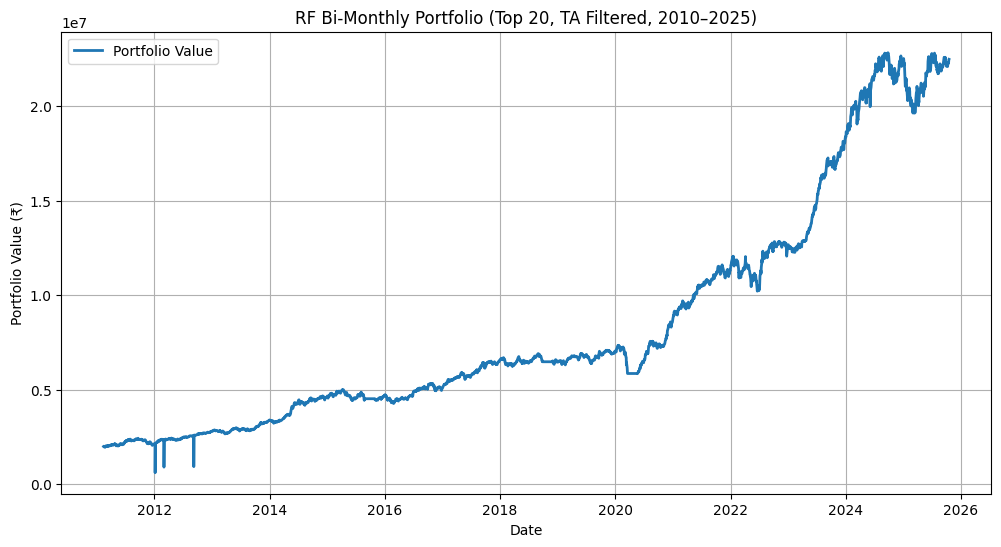

In [32]:
# ---------- OUTPUT ----------
print("\n📊 RF Bi-Monthly Portfolio Performance (2010–2025, Top 20 Stocks, Medium-Term TA Filtered):")
print(f"Initial Capital: ₹{start_value:,.0f}")
print(f"Final Portfolio Value: ₹{end_value:,.0f}")
print(f"CAGR: {cagr*100:.2f}%")
print(f"Annualized Volatility: {ann_vol*100:.2f}%")
print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"Max Drawdown: {max_dd*100:.2f}%")
print(f"Total Transaction Costs: ₹{total_transaction_cost:,.0f}")
print(f"Final Portfolio Value (Net of Costs): ₹{end_value:,.0f}")


# ---------- PLOT ----------
plt.figure(figsize=(12,6))
plt.plot(portfolio_df['date'], portfolio_df['portfolio_value'], label='Portfolio Value', linewidth=2)
plt.xlabel('Date'); plt.ylabel('Portfolio Value (₹)')
plt.title('RF Bi-Monthly Portfolio (Top 20, TA Filtered, 2010–2025)')
plt.grid(True); plt.legend(); plt.show()


/tmp/ipython-input-1231640817.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_nifty = yf.download("^NSEI", start=portfolio_df['date'].min(), end=portfolio_df['date'].max())
[*********************100%***********************]  1 of 1 completed


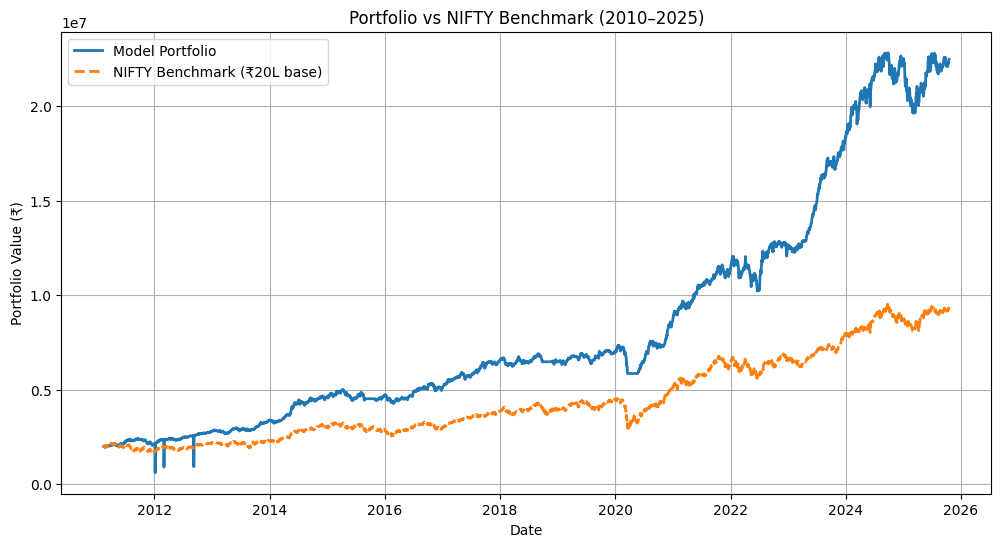

In [38]:
# ---------- BENCHMARK COMPARISON  ----------

import yfinance as yf

# Fetch NIFTY 50 index data
df_nifty = yf.download("^NSEI", start=portfolio_df['date'].min(), end=portfolio_df['date'].max())
df_nifty = df_nifty.reset_index()

# 🧩 FIX 1: Flatten MultiIndex if present
df_nifty.columns = [col[0] if isinstance(col, tuple) else col for col in df_nifty.columns]

# Keep only required columns
df_nifty = df_nifty[['Date', 'Close']].rename(columns={'Date': 'date', 'Close': 'close'})
df_nifty['date'] = pd.to_datetime(df_nifty['date']).dt.tz_localize(None)

# 🧩 FIX 2: Ensure both have same dtype and are sorted
portfolio_df['date'] = pd.to_datetime(portfolio_df['date']).dt.tz_localize(None)
df_nifty = df_nifty.sort_values('date').reset_index(drop=True)
portfolio_df = portfolio_df.sort_values('date').reset_index(drop=True)

# Align dates (nearest available date)
nifty_aligned = pd.merge_asof(
    portfolio_df[['date', 'portfolio_value']],
    df_nifty,
    on='date',
    direction='backward'
)

nifty_aligned.rename(columns={'close': 'nifty_close'}, inplace=True)

# Normalize both to ₹2,000,000 base
nifty_aligned['nifty_value'] = (
    initial_capital * nifty_aligned['nifty_close'] / nifty_aligned['nifty_close'].iloc[0]
)


# ---------- PLOT 1: Portfolio vs NIFTY ----------
plt.figure(figsize=(12,6))
plt.plot(portfolio_df['date'], portfolio_df['portfolio_value'], label='Model Portfolio', linewidth=2)
plt.plot(nifty_aligned['date'], nifty_aligned['nifty_value'], label='NIFTY Benchmark (₹20L base)', linewidth=2, linestyle='--')
plt.title('Portfolio vs NIFTY Benchmark (2010–2025)')
plt.xlabel('Date'); plt.ylabel('Portfolio Value (₹)')
plt.legend(); plt.grid(True)
plt.show()



In [35]:
# --- Align portfolio and NIFTY returns for same dates ---
merged = pd.merge_asof(
    portfolio_df[['date', 'returns']],
    nifty_aligned[['date', 'nifty_close']],
    on='date'
)

# Compute NIFTY daily returns
merged['nifty_ret'] = merged['nifty_close'].pct_change()

# Drop missing values (important for np.cov)
aligned = merged.dropna(subset=['returns', 'nifty_ret'])

# Compute covariance and beta
cov = np.cov(aligned['returns'], aligned['nifty_ret'])[0, 1]
var_m = np.var(aligned['nifty_ret'])
beta = cov / var_m

print(f"Portfolio Beta vs NIFTY: {beta:.2f}")



Portfolio Beta vs NIFTY: 0.38


In [36]:
# === Jensen's Alpha Recalculation ===
rf = 0.06  # 6% annual risk-free rate

# Compute CAGR for portfolio and NIFTY
portfolio_cagr = ((portfolio_df['portfolio_value'].iloc[-1] / portfolio_df['portfolio_value'].iloc[0]) ** (1 / ((portfolio_df['date'].iloc[-1] - portfolio_df['date'].iloc[0]).days / 365.25))) - 1
nifty_cagr = ((nifty_aligned['nifty_value'].iloc[-1] / nifty_aligned['nifty_value'].iloc[0]) ** (1 / ((nifty_aligned['date'].iloc[-1] - nifty_aligned['date'].iloc[0]).days / 365.25))) - 1

# Jensen’s Alpha (annualized)
alpha = (portfolio_cagr - (rf + beta * (nifty_cagr - rf))) * 100
print(f"📈 Jensen's Alpha (annualized): {alpha:.2f}%")


📈 Jensen's Alpha (annualized): 10.02%


In [40]:

# Risk-free rate (annual)
risk_free_rate = 0.06  # 6% annual
# --- 3️⃣ Sortino Ratio ---
# Uses downside deviation instead of total volatility
downside_returns = merged['returns'][merged['returns'] < 0]
downside_std = downside_returns.std() * np.sqrt(252)
avg_return = merged['returns'].mean() * 252
sortino_ratio = (avg_return - risk_free_rate) / downside_std if downside_std != 0 else np.nan


print(f"⚙️ Sortino Ratio: {sortino_ratio:.2f}")


⚙️ Sortino Ratio: 0.83
